In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 
from textwrap import wrap
import ast
import itertools
import collections

### Simple EDA

In [6]:
df = pd.read_csv("india-v1-preprocessed.csv")

In [7]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67183 entries, 0 to 67182
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Text                               67183 non-null  object
 1   new_text                           67183 non-null  object
 2   languages                          67183 non-null  object
 3   pos_tagged_words                   67183 non-null  object
 4   words_processed_all                67183 non-null  object
 5   words_processed_noun_adj_verb_adv  67183 non-null  object
 6   words_processed_noun               67183 non-null  object
dtypes: object(7)
memory usage: 3.6+ MB


In [9]:
df[df.duplicated()==True]

,Text,new_text,languages,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun


In [10]:
df.describe()

,Text,new_text,languages,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun
count,67183,67183,67183,67183,67183,67183,67183
unique,67183,67179,1,66010,65429,64409,59552
top,oh missed update soniya i got full vaccinated ...,sir majority students studying abroad have not...,ENGLISH,"[('syringe', 'NN'), ('about', 'IN'), ('sixteen...",['vaccinated'],['vaccinate'],[]
freq,1,2,67183,80,105,183,1411


In [11]:
df.dtypes

Text                                 object
new_text                             object
languages                            object
pos_tagged_words                     object
words_processed_all                  object
words_processed_noun_adj_verb_adv    object
words_processed_noun                 object
dtype: object

In [12]:
df.head()

,Text,new_text,languages,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun
0,"#pickids : about 20,000 children perlis eligib...","#pickids : about 20,000 children perlis eligib...",ENGLISH,"[('pickids', 'NNS'), ('about', 'IN'), ('twenty...","['pickids', 'twenty', 'zero', 'child', 'perlis...","['pickid', 'child', 'perli', 'eligible', 'covi...","['pickid', 'child', 'vaccination']"
1,previous covid-19 infection – but not vaccinat...,previous covid-19 infection – but not vaccinat...,ENGLISH,"[('previous', 'JJ'), ('covid', 'NN'), ('ninete...","['previous', 'covid', 'nineteen', 'infection',...","['previous', 'covid', 'infection', 'vaccinatio...","['infection', 'vaccination', 'performance', 'a..."
2,india’s covid-19 vaccination coverage crosses ...,india’s covid-19 vaccination coverage crosses ...,ENGLISH,"[('india', 'NN'), ('covid', 'NN'), ('nineteen'...","['india', 'covid', 'nineteen', 'vaccination', ...","['covid', 'vaccination', 'coverage_crosse', 'm...","['vaccination', 'mark']"
3,i got call office principal commissioner cgst ...,i got call office principal commissioner cgst ...,ENGLISH,"[('call', 'NN'), ('office', 'NN'), ('principal...","['call', 'office', 'principal', 'commissioner'...","['principal', 'commissioner', 'ascertain', 'st...","['commissioner', 'status', 'vaccination', 'dos..."
4,"i have booked flight 13 feb, 2022 toronto new ...","i have booked flight 13 feb, 2022 toronto new ...",ENGLISH,"[('have', 'VB'), ('booked', 'VBN'), ('flight',...","['booked', 'flight', 'thirteen', 'toronto', 'd...","['book', 'flight', 'departure', 'time', 'know'...","['flight', 'departure', 'time', 'guideline', '..."


In [13]:
df["languages"].value_counts()

ENGLISH    67183
Name: languages, dtype: int64

### Sentence Length Distribution

In [14]:
sns.set(rc = {'figure.figsize':(6,6)})

Max length: 293, Min length: 1, Average Length :  153.39658842266644


<AxesSubplot:>

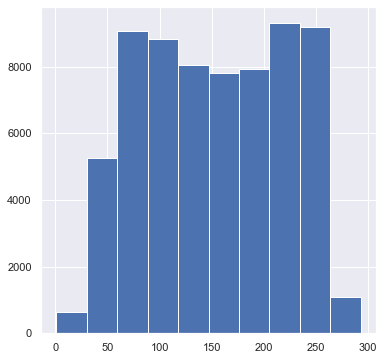

In [15]:
#sentence length distribution
print('Max length: {}, Min length: {}, Average Length :  {}'.format(max(df['Text'].str.len()),min(df['Text'].str.len()),df['Text'].str.len().mean()))
df['Text'].str.len().hist()

### Word Count

In [16]:
#Review word count: Just to get a simple sensing of the word count in the reviews
word_count = []
for each in df["Text"]:
    words_list = each.split(" ")
    word_count.append(len(words_list))
df["word_count"] = word_count

In [17]:
df.head()

,Text,new_text,languages,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun,word_count
0,"#pickids : about 20,000 children perlis eligib...","#pickids : about 20,000 children perlis eligib...",ENGLISH,"[('pickids', 'NNS'), ('about', 'IN'), ('twenty...","['pickids', 'twenty', 'zero', 'child', 'perlis...","['pickid', 'child', 'perli', 'eligible', 'covi...","['pickid', 'child', 'vaccination']",9
1,previous covid-19 infection – but not vaccinat...,previous covid-19 infection – but not vaccinat...,ENGLISH,"[('previous', 'JJ'), ('covid', 'NN'), ('ninete...","['previous', 'covid', 'nineteen', 'infection',...","['previous', 'covid', 'infection', 'vaccinatio...","['infection', 'vaccination', 'performance', 'a...",12
2,india’s covid-19 vaccination coverage crosses ...,india’s covid-19 vaccination coverage crosses ...,ENGLISH,"[('india', 'NN'), ('covid', 'NN'), ('nineteen'...","['india', 'covid', 'nineteen', 'vaccination', ...","['covid', 'vaccination', 'coverage_crosse', 'm...","['vaccination', 'mark']",8
3,i got call office principal commissioner cgst ...,i got call office principal commissioner cgst ...,ENGLISH,"[('call', 'NN'), ('office', 'NN'), ('principal...","['call', 'office', 'principal', 'commissioner'...","['principal', 'commissioner', 'ascertain', 'st...","['commissioner', 'status', 'vaccination', 'dos...",26
4,"i have booked flight 13 feb, 2022 toronto new ...","i have booked flight 13 feb, 2022 toronto new ...",ENGLISH,"[('have', 'VB'), ('booked', 'VBN'), ('flight',...","['booked', 'flight', 'thirteen', 'toronto', 'd...","['book', 'flight', 'departure', 'time', 'know'...","['flight', 'departure', 'time', 'guideline', '...",42


In [18]:
df["word_count"].describe()

count    67183.000000
mean        23.456068
std         10.860914
min          1.000000
25%         14.000000
50%         23.000000
75%         32.000000
max         61.000000
Name: word_count, dtype: float64

<AxesSubplot:>

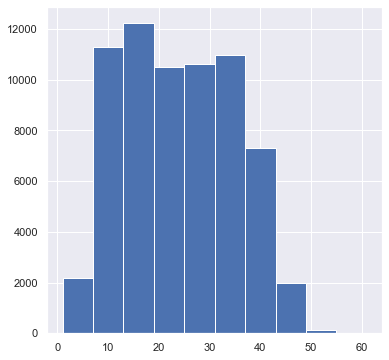

In [19]:
#word length distribution
df['word_count'].hist()

### Word Clouds

#### Text before preprocessing

In [35]:
stopwords = set(STOPWORDS)
stopwords.update(["covid", "nineteen", "vaccine", "vaccinated", "america", "usa", "country", "people", "today", "need", "vaccination", 
                  "covidvaccine", "vaccinate", "dose", "go", "want", "fully", "thank", "getting", "first", "second", "take", "american", "already", "shot",
                 "available", "going", "person", "said", "even", "make", "give", "know", "time", "still", "unvaccinate", "pfizer", "covaxin", 
                 "unvaccinated", "moderna", "janssen", "anti-vaccination", "anti-vaccine", "antivaxxer", "effective-vaccine", "immunocompromised", 
                  "mandated-vaccine", "never-vaccine", "trust-vaccine", "vaccinesaveslives", "covid vaccine", "covid vaccination", "astrazeneca", "covaxin", 
                  "covishield", "covovax", "sputnik", "gamaleya", "vaxx", "though", "three", "really", "year", "thing", "come", "anti", "think", "india", "indian", 
                 "thanks", "covidvaccination", "centre", "center"])

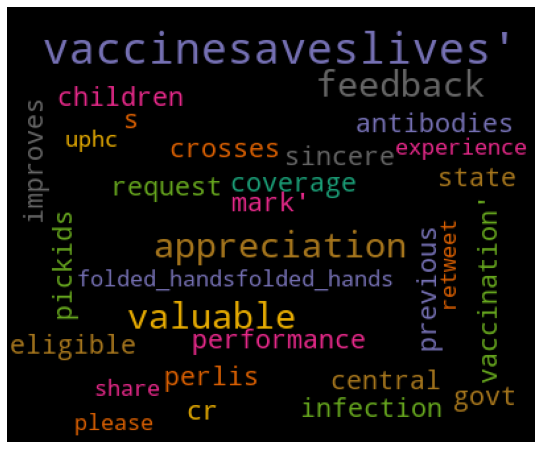

In [36]:
#overall wordcloud of text without preprocessing 

text = df['new_text'].values 
wordcloud = WordCloud(stopwords=stopwords, width=400, height=330, max_words=300,colormap="Dark2").generate(str(text))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### All processed words

In [22]:
def convert(a_series):
    consolidated_list = []
    str1 = " "
    for each in a_series:
        words_list = ast.literal_eval(each)
        for word in words_list:
            consolidated_list.append(word)
    return (str1.join(consolidated_list))

In [23]:
tweets_string = convert(df["words_processed_all"])


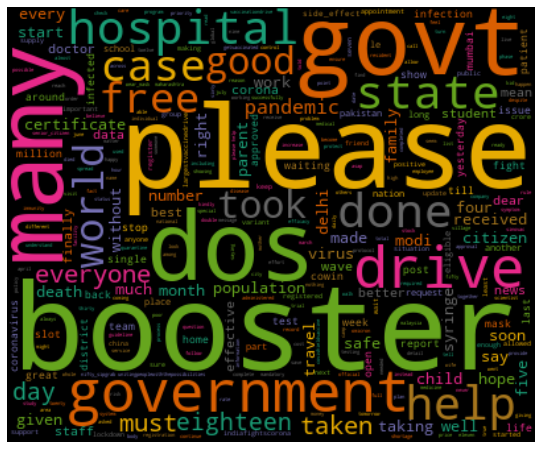

In [37]:
wordcloud = WordCloud(stopwords=stopwords, width=400, height=330, max_words=300,colormap="Dark2").generate(tweets_string)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### NOUN, ADJ, VERB, ADVERB

In [38]:
tweets_string_nounadj = convert(df["words_processed_noun_adj_verb_adv"])


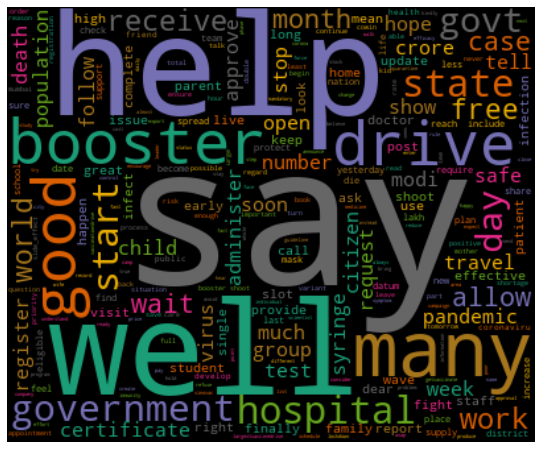

In [39]:
wordcloud = WordCloud(stopwords=stopwords, width=400, height=330, max_words=300,colormap="Dark2").generate(tweets_string_nounadj)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### NOUN

In [40]:
tweets_string_noun = convert(df["words_processed_noun"])

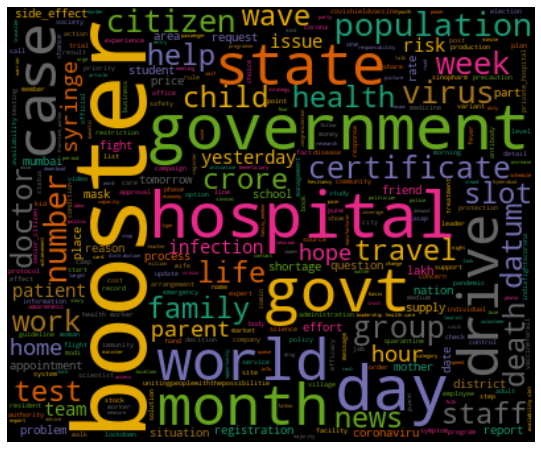

In [41]:
wordcloud = WordCloud(stopwords=stopwords, width=400, height=330, max_words=300,colormap="Dark2").generate(tweets_string_noun)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Count

#### words_processed_all

In [42]:
words_list_all = [ast.literal_eval(each) for each in df["words_processed_all"]]

In [43]:
# List of all words across tweets
all_words = list(itertools.chain(*words_list_all))
all_words_count = collections.Counter(all_words)

In [44]:
all_words_count.most_common(15)

[('vaccinated', 32972),
 ('vaccine', 31482),
 ('covid', 29397),
 ('vaccination', 18337),
 ('nineteen', 11319),
 ('people', 10007),
 ('dose', 9704),
 ('india', 9481),
 ('covishield', 7680),
 ('first', 5081),
 ('today', 4828),
 ('fully', 4741),
 ('please', 4198),
 ('take', 3863),
 ('country', 3558)]

#### words_processed_noun_adj_verb_adv

In [45]:
words_list_noun_adj_verb_adv = [ast.literal_eval(each) for each in df["words_processed_noun_adj_verb_adv"]]

In [46]:
# List of all words across tweets
noun_adj_verb_adv_words = list(itertools.chain(*words_list_noun_adj_verb_adv))
noun_adj_verb_adv_words_count = collections.Counter(noun_adj_verb_adv_words)

In [47]:
noun_adj_verb_adv_words_count.most_common(15)

[('vaccine', 30543),
 ('covid', 27407),
 ('vaccinate', 19878),
 ('vaccination', 17987),
 ('vaccinated', 14125),
 ('dose', 12367),
 ('people', 10001),
 ('take', 7587),
 ('covishield', 6306),
 ('first', 4874),
 ('today', 4828),
 ('fully', 4741),
 ('get', 4022),
 ('need', 3715),
 ('country', 3520)]

#### words_processed_noun

In [48]:
words_list_noun = [ast.literal_eval(each) for each in df["words_processed_noun"]]

In [49]:
# List of all words across tweets
noun_words = list(itertools.chain(*words_list_noun))
noun_words_count = collections.Counter(noun_words)

In [50]:
noun_words_count.most_common(15)

[('vaccine', 29598),
 ('vaccination', 17788),
 ('dose', 11323),
 ('people', 10000),
 ('covishield', 5161),
 ('today', 4826),
 ('country', 3512),
 ('time', 3202),
 ('covaxin', 2993),
 ('year', 2893),
 ('hospital', 2742),
 ('booster', 2544),
 ('government', 2470),
 ('health', 2416),
 ('day', 2348)]

### Polarity

In [51]:
from textblob import TextBlob
df['polarity']=df['words_processed_all'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [52]:
print("3 Random Tweets with Highest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:3].index]['Text']):
  print('Tweets {}:\n'.format(index+1),review)

3 Random Tweets with Highest Polarity:
Tweets 1:
 if we have one india, why are states floating global tenders #covidvaccine where is unity best centre float tender, negotiate price delivery terms then recover that bill state 🙏🙏🙏
Tweets 2:
 kudos way you are handling #covid19vaccination drive is wonderful, i got my mother vaccinated yesterday, ultra smooth process. just waiting time is 30 mins observation.
Tweets 3:
 sahib maharashtra you have done excellent job curb covid 19 now since lockdown is being lifted please make it compulsory produce both vaccinated certificates marriage halls religious gatherings offices etc etc as these are hot spots


In [53]:
print("3 Random Tweets with Lowest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=True)[:3].index]['Text']):
  print('Tweet {}:\n'.format(index+1),review)

3 Random Tweets with Lowest Polarity:
Tweet 1:
 pls get them vaccinated, getting covid prison is devastating
Tweet 2:
 not delhi. no covaxin. no sputnik. terrible terrible management.
Tweet 3:
 mam. side effect covid vaccine is very horrible. some info are coming like this. how authorities justify this


In [54]:
df.describe()

,word_count,polarity
count,67183.000000,67183.000000
mean,23.456068,0.105782
std,10.860914,0.240139
min,1.000000,-1.000000
25%,14.000000,0.000000
50%,23.000000,0.000000
75%,32.000000,0.250000
max,61.000000,1.000000


### VADER Sentiment

In [55]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/janviaswani/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [56]:
#Test
sid.polarity_scores("This is an excellent car with great mileage")

{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'compound': 0.8316}

In [57]:
df['scores'] = df['new_text'].apply(lambda tweet: sid.polarity_scores(tweet))
df

,Text,new_text,languages,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun,word_count,polarity,scores
0,"#pickids : about 20,000 children perlis eligib...","#pickids : about 20,000 children perlis eligib...",ENGLISH,"[('pickids', 'NNS'), ('about', 'IN'), ('twenty...","['pickids', 'twenty', 'zero', 'child', 'perlis...","['pickid', 'child', 'perli', 'eligible', 'covi...","['pickid', 'child', 'vaccination']",9,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,previous covid-19 infection – but not vaccinat...,previous covid-19 infection – but not vaccinat...,ENGLISH,"[('previous', 'JJ'), ('covid', 'NN'), ('ninete...","['previous', 'covid', 'nineteen', 'infection',...","['previous', 'covid', 'infection', 'vaccinatio...","['infection', 'vaccination', 'performance', 'a...",12,-0.166667,"{'neg': 0.273, 'neu': 0.727, 'pos': 0.0, 'comp..."
2,india’s covid-19 vaccination coverage crosses ...,india’s covid-19 vaccination coverage crosses ...,ENGLISH,"[('india', 'NN'), ('covid', 'NN'), ('nineteen'...","['india', 'covid', 'nineteen', 'vaccination', ...","['covid', 'vaccination', 'coverage_crosse', 'm...","['vaccination', 'mark']",8,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,i got call office principal commissioner cgst ...,i got call office principal commissioner cgst ...,ENGLISH,"[('call', 'NN'), ('office', 'NN'), ('principal...","['call', 'office', 'principal', 'commissioner'...","['principal', 'commissioner', 'ascertain', 'st...","['commissioner', 'status', 'vaccination', 'dos...",26,0.200000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,"i have booked flight 13 feb, 2022 toronto new ...","i have booked flight 13 feb, 2022 toronto new ...",ENGLISH,"[('have', 'VB'), ('booked', 'VBN'), ('flight',...","['booked', 'flight', 'thirteen', 'toronto', 'd...","['book', 'flight', 'departure', 'time', 'know'...","['flight', 'departure', 'time', 'guideline', '...",42,0.000000,"{'neg': 0.0, 'neu': 0.944, 'pos': 0.056, 'comp..."
...,...,...,...,...,...,...,...,...,...,...
67178,"dear , we #india 🇮🇳has helped this #world incl...","dear , we #india Indiahas helped this #world i...",ENGLISH,"[('dear', 'JJ'), ('india', 'NN'), ('indiahas',...","['dear', 'india', 'indiahas', 'helped', 'world...","['dear', 'indiaha', 'help', 'world', 'include'...","['indiaha', 'world', 'need', 'kindnessmatter',...",23,0.000000,"{'neg': 0.103, 'neu': 0.794, 'pos': 0.103, 'co..."
67179,11k discharges recovery rate going up. both ar...,11k discharges recovery rate going up. both ar...,ENGLISH,"[('discharges', 'NNS'), ('recovery', 'NN'), ('...","['discharge', 'recovery_rate', 'going', 'good'...","['discharge', 'recovery_rate', 'go', 'good', '...","['discharge', 'sign', 'decline', 'case', 'day'...",37,0.121429,"{'neg': 0.0, 'neu': 0.832, 'pos': 0.168, 'comp..."
67180,our sincere request state central govt 🙏🙏. ple...,our sincere request state central govt folded_...,ENGLISH,"[('sincere', 'RB'), ('request', 'NN'), ('state...","['sincere', 'request', 'state', 'central', 'go...","['sincere', 'request', 'state', 'central', 'go...","['request', 'state', 'govt', 'share', 'vaccine...",11,0.250000,"{'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'comp..."
67181,thanks your appreciation valuable feedback abo...,thanks your appreciation valuable feedback abo...,ENGLISH,"[('thanks', 'NNS'), ('your', 'PRP$'), ('apprec...","['thanks', 'appreciation', 'valuable', 'feedba...","['thank', 'appreciation', 'valuable', 'feedbac...","['thank', 'appreciation', 'feedback', 'vaccine...",9,0.200000,"{'neg': 0.0, 'neu': 0.392, 'pos': 0.608, 'comp..."


In [58]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
df

,Text,new_text,languages,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun,word_count,polarity,scores,compound
0,"#pickids : about 20,000 children perlis eligib...","#pickids : about 20,000 children perlis eligib...",ENGLISH,"[('pickids', 'NNS'), ('about', 'IN'), ('twenty...","['pickids', 'twenty', 'zero', 'child', 'perlis...","['pickid', 'child', 'perli', 'eligible', 'covi...","['pickid', 'child', 'vaccination']",9,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,previous covid-19 infection – but not vaccinat...,previous covid-19 infection – but not vaccinat...,ENGLISH,"[('previous', 'JJ'), ('covid', 'NN'), ('ninete...","['previous', 'covid', 'nineteen', 'infection',...","['previous', 'covid', 'infection', 'vaccinatio...","['infection', 'vaccination', 'performance', 'a...",12,-0.166667,"{'neg': 0.273, 'neu': 0.727, 'pos': 0.0, 'comp...",-0.4585
2,india’s covid-19 vaccination coverage crosses ...,india’s covid-19 vaccination coverage crosses ...,ENGLISH,"[('india', 'NN'), ('covid', 'NN'), ('nineteen'...","['india', 'covid', 'nineteen', 'vaccination', ...","['covid', 'vaccination', 'coverage_crosse', 'm...","['vaccination', 'mark']",8,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,i got call office principal commissioner cgst ...,i got call office principal commissioner cgst ...,ENGLISH,"[('call', 'NN'), ('office', 'NN'), ('principal...","['call', 'office', 'principal', 'commissioner'...","['principal', 'commissioner', 'ascertain', 'st...","['commissioner', 'status', 'vaccination', 'dos...",26,0.200000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,"i have booked flight 13 feb, 2022 toronto new ...","i have booked flight 13 feb, 2022 toronto new ...",ENGLISH,"[('have', 'VB'), ('booked', 'VBN'), ('flight',...","['booked', 'flight', 'thirteen', 'toronto', 'd...","['book', 'flight', 'departure', 'time', 'know'...","['flight', 'departure', 'time', 'guideline', '...",42,0.000000,"{'neg': 0.0, 'neu': 0.944, 'pos': 0.056, 'comp...",0.3182
...,...,...,...,...,...,...,...,...,...,...,...
67178,"dear , we #india 🇮🇳has helped this #world incl...","dear , we #india Indiahas helped this #world i...",ENGLISH,"[('dear', 'JJ'), ('india', 'NN'), ('indiahas',...","['dear', 'india', 'indiahas', 'helped', 'world...","['dear', 'indiaha', 'help', 'world', 'include'...","['indiaha', 'world', 'need', 'kindnessmatter',...",23,0.000000,"{'neg': 0.103, 'neu': 0.794, 'pos': 0.103, 'co...",0.0000
67179,11k discharges recovery rate going up. both ar...,11k discharges recovery rate going up. both ar...,ENGLISH,"[('discharges', 'NNS'), ('recovery', 'NN'), ('...","['discharge', 'recovery_rate', 'going', 'good'...","['discharge', 'recovery_rate', 'go', 'good', '...","['discharge', 'sign', 'decline', 'case', 'day'...",37,0.121429,"{'neg': 0.0, 'neu': 0.832, 'pos': 0.168, 'comp...",0.7227
67180,our sincere request state central govt 🙏🙏. ple...,our sincere request state central govt folded_...,ENGLISH,"[('sincere', 'RB'), ('request', 'NN'), ('state...","['sincere', 'request', 'state', 'central', 'go...","['sincere', 'request', 'state', 'central', 'go...","['request', 'state', 'govt', 'share', 'vaccine...",11,0.250000,"{'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'comp...",0.7351
67181,thanks your appreciation valuable feedback abo...,thanks your appreciation valuable feedback abo...,ENGLISH,"[('thanks', 'NNS'), ('your', 'PRP$'), ('apprec...","['thanks', 'appreciation', 'valuable', 'feedba...","['thank', 'appreciation', 'valuable', 'feedbac...","['thank', 'appreciation', 'feedback', 'vaccine...",9,0.200000,"{'neg': 0.0, 'neu': 0.392, 'pos': 0.608, 'comp...",0.8519


In [59]:
df["compound"].value_counts()

 0.0000    18004
 0.4404     1430
 0.3612     1105
 0.3182     1100
-0.2960     1086
           ...  
-0.5784        1
-0.3369        1
 0.7382        1
-0.8059        1
 0.8867        1
Name: compound, Length: 5585, dtype: int64

In [60]:
sentiment = []
for each in df["compound"]:
    if each == 0:
        sentiment.append("neutral")
    elif each > 0:
        sentiment.append("positive")
    else:
        sentiment.append("negative")

In [61]:
df["sentiment"] = sentiment

<AxesSubplot:>

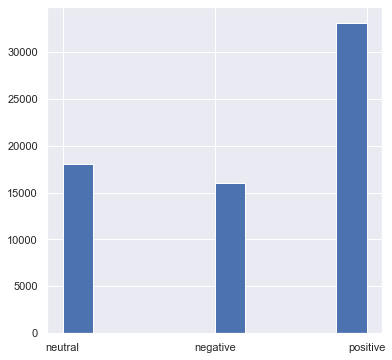

In [62]:
df["sentiment"].hist()

In [63]:
pos = df[df["sentiment"] == "positive"]
neg = df[df["sentiment"] == "negative"]
neu = df[df["sentiment"] == "neutral"]

In [64]:
for each in pos.sample(n=3)["Text"]:
    print("Tweet: " + each)
    print(" ")

Tweet: yes i did. they not be vaccinated this campaign. even developed countries , vaccination under 18 has not started en mass
 
Tweet: corona thing is spreading like wildfire again. i don’t understand 6 colleagues two weeks funny thing is they’ve all been vaccinated cos my company made it compulsory. i’m just lost
 
Tweet: assam has vaccinated 37 lacs by now..with proper management strategy guwahati city has been vaccinated almost 40 45 % its population keep urban safe first also minimise spread urban rural part..kejriwal govt should learn optimum usage resources..
 


In [65]:
for each in neu.sample(n=3)["Text"]:
    print("Tweet: " + each)
    print(" ")

Tweet: what is difference bewtween yoo tiao cakoi then one hokkien/cantonese
 
Tweet: maharashtra today vaccinated 5.6 lakhs plus people, non bjp state..
 
Tweet: #covishield #covaxin post vaccination data
 


In [66]:
for each in neg.sample(n=3)["Text"]:
    print("Tweet: " + each)
    print(" ")

Tweet: instead start 1st dose all age groups simultaneously &amp; follow d gap more dan 6 or 8 wks betwn 2 dose have higher efficacy#as already many people r hesitant take d vaccine &amp; if news will spread peopel getting covid even after 2 dose than many people will back out.
 
Tweet: mamata has further objected why not talk john only why his son has be involved deal. now centre is going moderna avoid arguments. 🤣🤣🤣🤣🤣
 
Tweet: fully vaccinated 70+year-old seniors were left untouched by #covid19, while younger ones who got shot few days back were infected. vaccines work:. #covishield oxford #covaxin indigenous india
 
